In [1]:
#Question 1 
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
#to download the data of the stock of Cisco Systems Inc by month.
data = yf.download('CSCO', start='2015-01-01', end='2020-01-31',interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [6]:
#The stock price of CSCO for the first couple of months.
data['Adj Close'].head()

Date
2015-01-01    19.908743
2015-02-01    22.432571
2015-03-01    20.927452
2015-04-01    22.083382
2015-05-01    22.451054
Name: Adj Close, dtype: float64

In [7]:
#To check the stock price of CSCO in the last couple of months.
data['Adj Close'].tail()

Date
2019-09-01    43.328835
2019-10-01    41.662674
2019-11-01    40.034386
2019-12-01    42.375843
2020-01-01    40.617542
Name: Adj Close, dtype: float64

In [8]:
#to compute the monthly log return
data['LogRet'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
month_log_return=data['LogRet']

In [9]:
#to compute the annualized return based on monthly log return.
annualized_return = data['LogRet'].mean() * 12

In [10]:
#This is the monthly log return of Apple stock price.
month_log_return

Date
2015-01-01         NaN
2015-02-01    0.119355
2015-03-01   -0.069452
2015-04-01    0.053764
2015-05-01    0.016512
                ...   
2019-09-01    0.054056
2019-10-01   -0.039213
2019-11-01   -0.039867
2019-12-01    0.056840
2020-01-01   -0.042378
Name: LogRet, Length: 61, dtype: float64

In [11]:
#This is the annualised return of this stock.
print(f'Annualized return: {annualized_return * 100:.2f}%')

Annualized return: 14.26%


In [12]:
#to compute annualised volatility
annualized_volatility = data['LogRet'].std() * np.sqrt(12)
print(f'Annualized Volatility: {annualized_volatility * 100:.2f}%')

Annualized Volatility: 21.80%


In [13]:
#import esg data
import yesg
from datetime import datetime

In [14]:
#compute historical data
ESG_for_all = yesg.get_historic_esg('CSCO')
ESG_for_all

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,80.00,86.00,79.00,72.00
2014-10-01,78.00,86.00,79.00,72.00
2014-11-01,80.00,86.00,79.00,72.00
2014-12-01,80.00,86.00,79.00,72.00
2015-01-01,80.00,86.00,79.00,72.00
...,...,...,...,...
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,11.82,0.03,5.59,6.20
2022-06-01,NaN,NaN,NaN,NaN


In [15]:
#to give the data in the time frame between 2015-01-01 to 2019-12-31
ESG=ESG_for_all.iloc[4:65]
ESG

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2015-01-01,80.00,86.00,79.00,72.00
2015-02-01,80.00,86.00,79.00,72.00
2015-03-01,80.00,85.00,79.00,72.00
2015-04-01,80.00,85.00,79.00,72.00
2015-05-01,80.00,85.00,79.00,72.00
...,...,...,...,...
2019-09-01,80.15,84.12,84.20,68.15
2019-10-01,80.15,84.12,84.20,68.15
2019-11-01,79.98,84.12,84.20,67.45


In [16]:
#fill them using the data from the previous month if there is no data
ESG_filled = ESG.fillna(method='ffill')
#show the data
ESG_filled

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2015-01-01,80.00,86.00,79.00,72.00
2015-02-01,80.00,86.00,79.00,72.00
2015-03-01,80.00,85.00,79.00,72.00
2015-04-01,80.00,85.00,79.00,72.00
2015-05-01,80.00,85.00,79.00,72.00
...,...,...,...,...
2019-09-01,80.15,84.12,84.20,68.15
2019-10-01,80.15,84.12,84.20,68.15
2019-11-01,79.98,84.12,84.20,67.45


Text(0.5, 1.0, 'ESG for Cisco Systems Inc.')

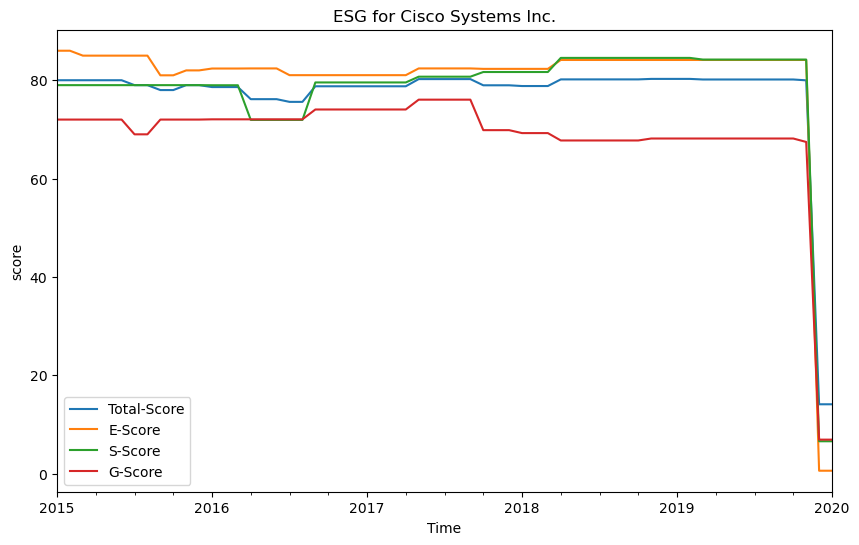

In [17]:
#plot the graph of ESG
ESG_filled.plot(figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('score')
plt.title('ESG for Cisco Systems Inc.')

In [18]:
#the correlation
correlation = data['Adj Close'].corr(ESG_filled['Total-Score'])
print(f"The correlation between the stock price of CSCO and ESG total score from 2015-01-01 to 2019-12-31 is {correlation:.4f}")
#My analysis: The E-score, S-score and G-score as well as ESG total score all have a decreasing trend with time.
#This indicate that the firm has done worse and worse in the sustainability criteria.

The correlation between the stock price of CSCO and ESG total score from 2015-01-01 to 2019-12-31 is -0.1624


In [19]:
#Question 2

#I was born in Fuzhou, China, in July.
#Latitude: 26.0827° N
#Longitude: 119.3060° E
#Altitude: The altitude of Fuzhou averagely is around 10 meters above sea level.

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

start = datetime(2022, 7, 1)
end = datetime(2022, 7, 31)
location = Point(26.0827, 119.3060, 10)

In [21]:
data = Daily(location, start, end)
data = data.fetch()

In [22]:
T_base = 18
cdds = [max(temp - T_base, 0) for temp in data.tavg]
cdds

[10.600000000000001,
 9.0,
 9.600000000000001,
 10.8,
 10.2,
 10.8,
 11.8,
 13.2,
 13.399999999999999,
 13.0,
 12.600000000000001,
 12.2,
 12.399999999999999,
 12.2,
 13.0,
 12.600000000000001,
 12.600000000000001,
 12.0,
 12.8,
 13.8,
 14.100000000000001,
 14.200000000000003,
 14.0,
 13.600000000000001,
 12.8,
 12.8,
 12.600000000000001,
 11.8,
 12.600000000000001,
 12.2,
 13.8]

In [23]:
#To find out the total cdd we sum up all the cdds in that particular month.
total_cdd = sum(cdds)
print("Total CDD:", total_cdd)

Total CDD: 383.1000000000001
